# Street network processing

Input street network normally represents transportation network. However, that comes with dual lines, roundabouts and other transportation focused features, which causes imprecision of morphometric analysis.

Currently, preprocessing aims to consolidate nodes and edges of street network to get morphological, not trasporation geometry.

`consolidate` function is loaded from `consolidate.py`.

In [1]:
import geopandas as gpd

from consolidate import consolidate

In [2]:
help(consolidate)

Help on function consolidate in module consolidate:

consolidate(network, distance=2, epsilon=2, filter_f=<function filter_comp at 0x7fd0c96f69d0>, **kwargs)
    Consolidate edges of a network, takes care of geometry only. No
    attributes are preserved at the moment.
    
    The whole process is split into several steps:
    1. Polygonize network
    2. Find polygons which are likely caused by dual lines and other
       geometries to be consolidated.
    3. Iterate over those polygons and generate averaged geometry
    4. Remove invalid and merge together with new geometry.
    
    Step 2 needs work, this is just a first attempt based on shape and area
    of the polygon. We will have to come with clever options here and 
    allow their specification, because each network will need different
    parameters.
    
    Either before or after these steps needs to be done node consolidation,
    but in a way which does not generate overlapping geometries.
    Overlapping geometries ca

In [3]:
network = gpd.read_file("https://gist.githubusercontent.com/martinfleis/367b3cb8f5c5a3f2c5b121174ef79990/raw/63290816c4834320233a2588c64317c9f47e3ed6/sample.geojson")

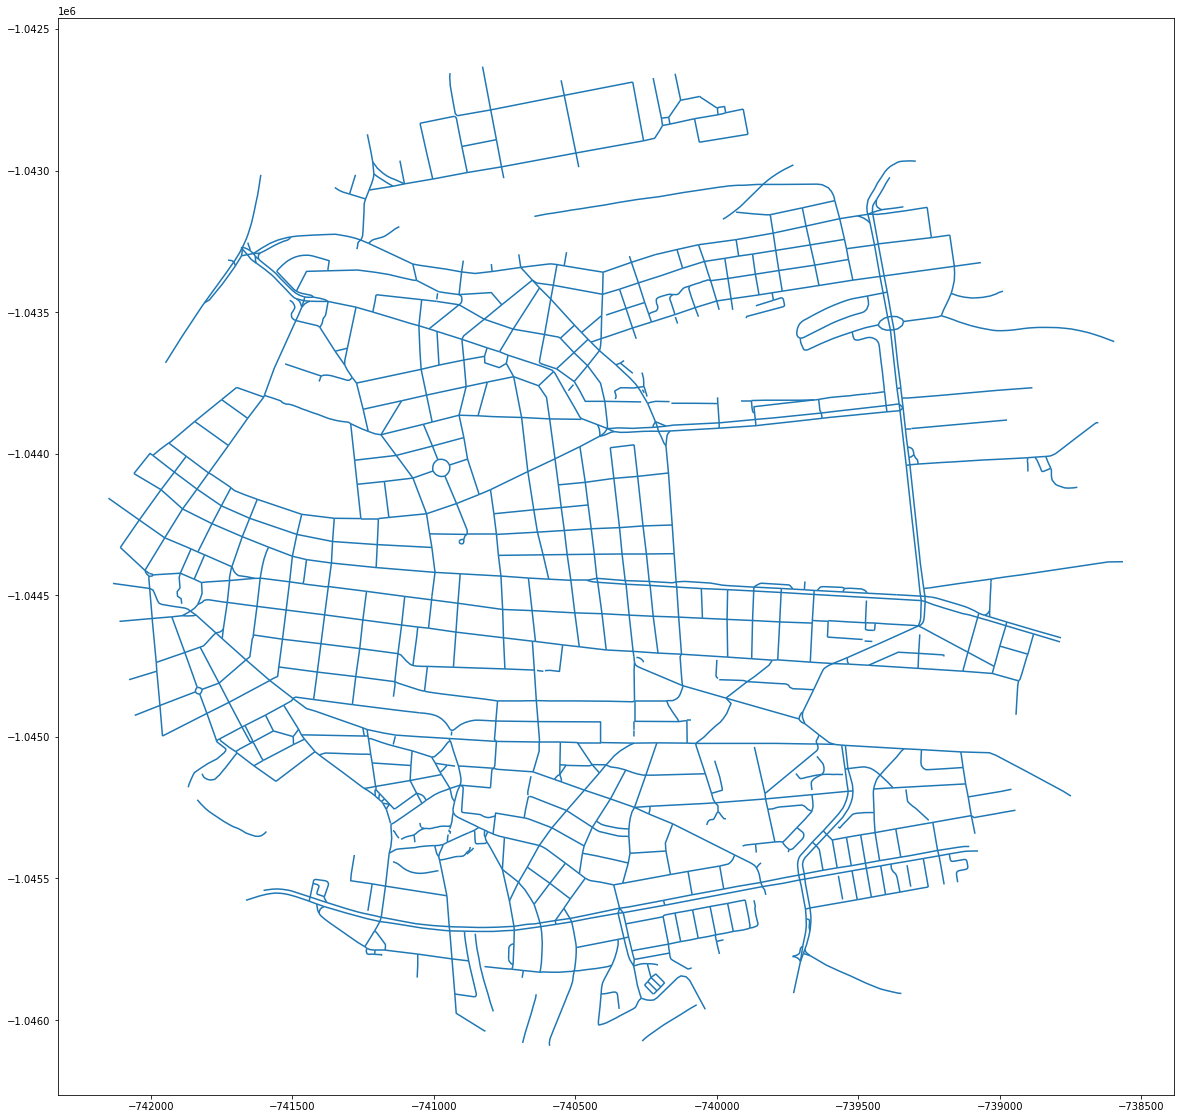

In [4]:
network.plot(figsize=(20, 20))

In [5]:
consolidated = consolidate(network)

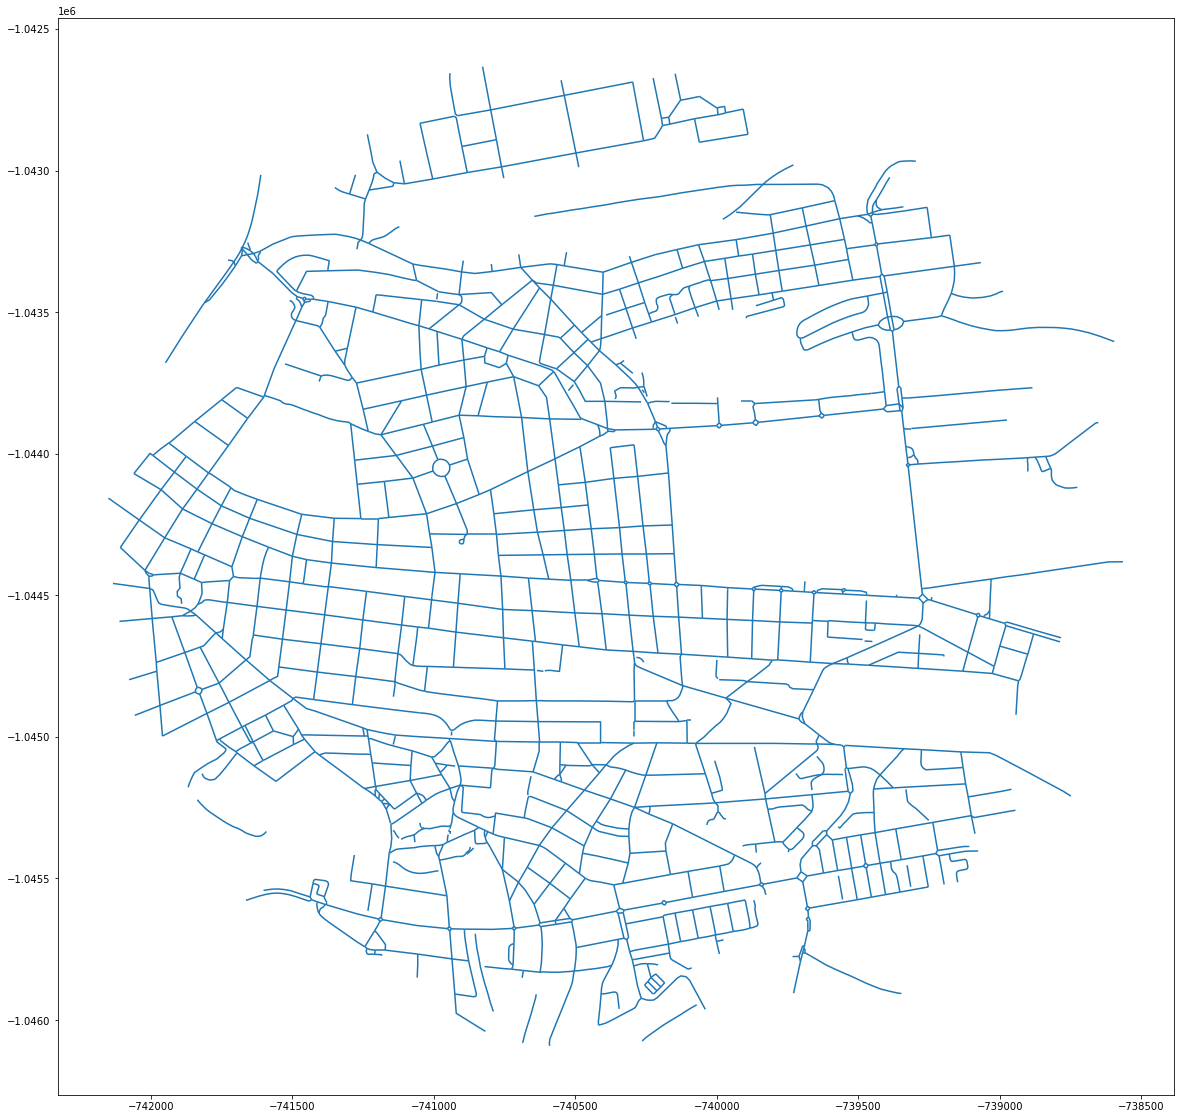

In [6]:
consolidated.plot(figsize=(20, 20))

TODO:

- figure out clever way of adaptable filters (to identify which polygons should not be there, i.e. which edges should be consolidated)
- triple/quadruple lines
- consolidate nodes in geometrical manner before (or after) edge consolidation. Current implementation of node consolidation creates overlapping lines causing issues with Voronoi. The optimal result should be spider-like.
- implementation into OSMnx, which has to deal with a mess of OSM (overlapping geometries)
- make it work for both GeoDataFrames and Graph
